In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/jkenglish/Desktop/DS 440/prediction_page.csv')

df

,Unnamed: 0,STATE,YEAR,MONTH_NAME,EVENT_TYPE,COUNTY_NAME,COUNTY_TIMEZONE,DAMAGE_PROPERTY,DAMAGE_CROPS,COUNTY/STATE
0,0,NEW HAMPSHIRE,2013,February,Winter Weather,EASTERN HILLSBOROUGH,EST-5,0.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
1,1,NEW HAMPSHIRE,2013,December,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
2,2,NEW HAMPSHIRE,2013,March,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
3,3,NEW HAMPSHIRE,2013,October,Strong Wind,EASTERN HILLSBOROUGH,EST-5,3000.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
4,4,NEW HAMPSHIRE,2013,February,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
...,...,...,...,...,...,...,...,...,...,...
608742,56395,IOWA,2006,October,Hail,MITCHELL,CST-6,65000.0,80000.0,"MITCHELL , IOWA"
608743,56396,IOWA,2006,October,Hail,HOWARD,CST-6,50000.0,75000.0,"HOWARD , IOWA"
608744,56397,IOWA,2006,October,Hail,WINNESHIEK,CST-6,5000.0,10000.0,"WINNESHIEK , IOWA"
608745,56398,IOWA,2006,October,Hail,MITCHELL,CST-6,80000.0,100000.0,"MITCHELL , IOWA"


In [3]:
df.shape

(608747, 10)

In [4]:
df2 = df.drop(['Unnamed: 0'],axis=1)

df2

,STATE,YEAR,MONTH_NAME,EVENT_TYPE,COUNTY_NAME,COUNTY_TIMEZONE,DAMAGE_PROPERTY,DAMAGE_CROPS,COUNTY/STATE
0,NEW HAMPSHIRE,2013,February,Winter Weather,EASTERN HILLSBOROUGH,EST-5,0.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
1,NEW HAMPSHIRE,2013,December,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
2,NEW HAMPSHIRE,2013,March,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
3,NEW HAMPSHIRE,2013,October,Strong Wind,EASTERN HILLSBOROUGH,EST-5,3000.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
4,NEW HAMPSHIRE,2013,February,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
...,...,...,...,...,...,...,...,...,...
608742,IOWA,2006,October,Hail,MITCHELL,CST-6,65000.0,80000.0,"MITCHELL , IOWA"
608743,IOWA,2006,October,Hail,HOWARD,CST-6,50000.0,75000.0,"HOWARD , IOWA"
608744,IOWA,2006,October,Hail,WINNESHIEK,CST-6,5000.0,10000.0,"WINNESHIEK , IOWA"
608745,IOWA,2006,October,Hail,MITCHELL,CST-6,80000.0,100000.0,"MITCHELL , IOWA"


In [5]:
df2.shape

(608747, 9)

In [6]:
df2['COUNTY/STATE'].unique()

array(['EASTERN HILLSBOROUGH , NEW HAMPSHIRE', 'HARRISON , MISSOURI',
       'JOHNSON , KANSAS', ...,
       'STONINGTON (DEER ISLE) ME TO MERRIMACK RIVER MA 25 TO 40NM , ATLANTIC NORTH',
       'WEST COLUMBIA RIVER GORGE , WASHINGTON',
       'LE WILLOWICK TO GENEVA ON THE LAKE OH BYD 5NM OFFSHORE TO INTL BORDER , LAKE ERIE'],
      dtype=object)

In [7]:
df2['EVENT_TYPE'].unique()

array(['Winter Weather', 'Heavy Snow', 'Strong Wind', 'High Wind',
       'Blizzard', 'Hail', 'Flood', 'Thunderstorm Wind', 'Drought',
       'High Surf', 'Winter Storm', 'Flash Flood', 'Tornado', 'Dense Fog',
       'Marine Thunderstorm Wind', 'Debris Flow', 'Excessive Heat',
       'Cold/Wind Chill', 'Lake-Effect Snow', 'Ice Storm',
       'Marine High Wind', 'Heavy Rain', 'Funnel Cloud', 'Rip Current',
       'Waterspout', 'Frost/Freeze', 'Wildfire', 'Lightning',
       'Dust Storm', 'Heat', 'Extreme Cold/Wind Chill', 'Coastal Flood',
       'Tropical Storm', 'Dust Devil', 'Avalanche', 'Marine Hail',
       'Marine Dense Fog', 'Marine Strong Wind', 'Hurricane',
       'Freezing Fog', 'Astronomical Low Tide', 'Sleet', 'Tsunami',
       'Sneakerwave', 'Storm Surge/Tide', 'Dense Smoke', 'Seiche',
       'Volcanic Ashfall', 'Landslide', 'Tropical Depression',
       'Hurricane (Typhoon)', 'Marine Tropical Storm',
       'Marine Hurricane/Typhoon', 'HAIL FLOODING',
       'THUNDERSTORM W

In [8]:
df2['MONTH_NAME'].unique()

array(['February', 'December', 'March', 'October', 'November', 'January',
       'June', 'May', 'April', 'August', 'July', 'September'],
      dtype=object)

In [41]:

display(df2['COUNTY/STATE'])


0         EASTERN HILLSBOROUGH , NEW HAMPSHIRE
1         EASTERN HILLSBOROUGH , NEW HAMPSHIRE
2         EASTERN HILLSBOROUGH , NEW HAMPSHIRE
3         EASTERN HILLSBOROUGH , NEW HAMPSHIRE
4         EASTERN HILLSBOROUGH , NEW HAMPSHIRE
                          ...                 
608742                         MITCHELL , IOWA
608743                           HOWARD , IOWA
608744                       WINNESHIEK , IOWA
608745                         MITCHELL , IOWA
608746                       ADAMS , WISCONSIN
Name: COUNTY/STATE, Length: 608747, dtype: object

In [10]:
df3 = df2.drop(['COUNTY_TIMEZONE','DAMAGE_CROPS','COUNTY_NAME','STATE'],axis=1)

df3


,YEAR,MONTH_NAME,EVENT_TYPE,DAMAGE_PROPERTY,COUNTY/STATE
0,2013,February,Winter Weather,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
1,2013,December,Heavy Snow,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
2,2013,March,Heavy Snow,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
3,2013,October,Strong Wind,3000.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
4,2013,February,Heavy Snow,0.0,"EASTERN HILLSBOROUGH , NEW HAMPSHIRE"
...,...,...,...,...,...
608742,2006,October,Hail,65000.0,"MITCHELL , IOWA"
608743,2006,October,Hail,50000.0,"HOWARD , IOWA"
608744,2006,October,Hail,5000.0,"WINNESHIEK , IOWA"
608745,2006,October,Hail,80000.0,"MITCHELL , IOWA"


In [11]:
label_encoder = LabelEncoder()


df3['COUNTY/STATE'] = label_encoder.fit_transform(df3['COUNTY/STATE'])

df3['EVENT_TYPE'] = label_encoder.fit_transform(df3['EVENT_TYPE'])

df3['MONTH_NAME'] = label_encoder.fit_transform(df3['MONTH_NAME'])


In [12]:
prediction_df = df3

prediction_df



,YEAR,MONTH_NAME,EVENT_TYPE,DAMAGE_PROPERTY,COUNTY/STATE
0,2013,3,68,0.0,1614
1,2013,2,23,0.0,1614
2,2013,7,23,0.0,1614
3,2013,10,47,3000.0,1614
4,2013,3,23,0.0,1614
...,...,...,...,...,...
608742,2006,10,20,65000.0,3485
608743,2006,10,20,50000.0,2384
608744,2006,10,20,5000.0,6115
608745,2006,10,20,80000.0,3485


In [13]:
prediction_df['COUNTY/STATE'].unique()

array([1614, 2278, 2660, ..., 5279, 5916, 2956])

In [14]:
prediction_df['MONTH_NAME'].unique()

array([ 3,  2,  7, 10,  9,  4,  6,  8,  0,  1,  5, 11])

In [15]:
prediction_df['EVENT_TYPE'].unique()

array([68, 23, 47, 25,  2, 20, 14, 59,  8, 24, 67, 13, 60,  6, 39,  5, 11,
        4, 29, 28, 35, 22, 17, 42, 65, 16, 66, 32, 10, 21, 12,  3, 62,  9,
        1, 34, 33, 38, 26, 15,  0, 44, 63, 45, 46,  7, 43, 64, 31, 61, 27,
       41, 36, 18, 54, 52, 49, 48, 50, 57, 56, 51, 53, 30, 40, 58, 55, 19,
       37])

In [16]:
prediction_df.to_csv('/Users/jkenglish/Desktop/VS_Projects/Streamlit/prediction_df.csv')





In [17]:

X = prediction_df.drop('DAMAGE_PROPERTY',axis=1)

y = prediction_df['DAMAGE_PROPERTY']






In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [19]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train,y_train)

predict_linear = linear_reg.predict(X_test)




In [20]:
error = np.sqrt(mean_squared_error(y_test,predict_linear))

print("${:,.02f}".format(error))

$31,872,912.54


In [21]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state=0)

dec_tree_reg.fit(X_train,y_train)

predict_dectree = dec_tree_reg.predict(X_test)



In [22]:
error = np.sqrt(mean_squared_error(y_test,predict_dectree))

print("${:,.02f}".format(error))

$46,057,904.83


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_reg = GradientBoostingRegressor(random_state=0)


grad_boost_reg.fit(X_train,y_train)


predict_grad_boost_reg = grad_boost_reg.predict(X_test)


In [24]:
error = np.sqrt(mean_squared_error(y_test,predict_grad_boost_reg))

print("${:,.02f}".format(error))

$31,686,949.28


In [25]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost_reg = AdaBoostRegressor(random_state=0)


ada_boost_reg.fit(X_train,y_train)


predict_ada_boost_reg = ada_boost_reg.predict(X_test)





In [26]:
error = np.sqrt(mean_squared_error(y_test,predict_ada_boost_reg))

print("${:,.02f}".format(error))

$187,324,954.63


In [27]:
from sklearn.neighbors import KNeighborsRegressor


kneighbors_reg = KNeighborsRegressor()


kneighbors_reg.fit(X_train,y_train)


predict_kneighbors_reg = kneighbors_reg.predict(X_test)





In [28]:
error = np.sqrt(mean_squared_error(y_test,predict_kneighbors_reg))

print("${:,.02f}".format(error))

$37,394,336.60


In [29]:
from sklearn.ensemble import ExtraTreesRegressor


extratrees_reg = ExtraTreesRegressor()


extratrees_reg.fit(X_train,y_train)


predict_extratrees_reg = extratrees_reg.predict(X_test)




In [30]:
error = np.sqrt(mean_squared_error(y_test,predict_extratrees_reg))

print("${:,.02f}".format(error))

$47,444,986.05


In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
#Xgboost Regressor


from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor()


xgb_reg.fit(X_train,y_train)


predict_xgb_reg = xgb_reg.predict(X_test)




In [33]:
error = np.sqrt(mean_squared_error(y_test,predict_xgb_reg))

print("${:,.02f}".format(error))


$37,762,044.07


In [34]:
#Bayesian Ridge

from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()


bayesian_ridge.fit(X_train,y_train)


predict_bayesian_ridge = bayesian_ridge.predict(X_test)




In [35]:
error = np.sqrt(mean_squared_error(y_test,predict_bayesian_ridge))

print("${:,.02f}".format(error))


$31,873,526.45


In [36]:
#Elastic Net Regression

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()


elasticnet.fit(X_train,y_train)


predict_elasticnet = elasticnet.predict(X_test)




In [37]:
error = np.sqrt(mean_squared_error(y_test,predict_elasticnet))

print("${:,.02f}".format(error))


$31,872,877.34


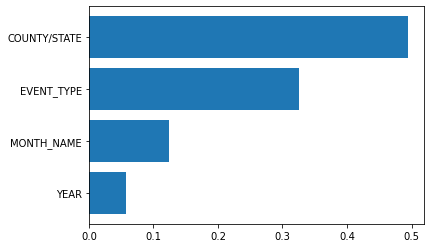

In [38]:
importances = grad_boost_reg.feature_importances_


indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X.columns)[indices])